In [1]:
#Enter your solution here
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db = pymysql.connect(host='localhost', port=3306, user='root', passwd='MyNewPass', db='chicagotaxidb')

In [3]:
def getRes(query):
    df = pd.read_sql(query, con=db)
    return df

In [ ]:
db.close()

In [8]:
#Average Fare_Rate per company
frComp = getRes("select * from (select Company,avg(fare/trip_miles) as Fare_Rate, avg((fare/Trip_Seconds)*60) as Fare_Minute,avg(trip_miles) as Avg_Trip_Miles ,count(1) as No_Of_Trips from taxi_mini group by Company) cr where No_Of_Trips >100 order by Fare_Rate desc;")
frComp

,Company,Fare_Rate,Fare_Minute,Avg_Trip_Miles,No_Of_Trips
0,Blue Ribbon Taxi Association Inc.,69.724487,1.001845,0.674234,3819
1,Taxi Affiliation Services,22.837999,1.072765,2.900192,24519
2,Unknown,6.265291,1.199601,4.262280,83082
3,Dispatch Taxi Affiliation,5.947795,1.078072,3.903477,12251
4,3591 - 63480 Chuks Cab,5.929380,0.907368,2.445192,104
5,Chicago Medallion Management,5.911162,1.045071,4.028846,3796
6,Chicago Medallion Leasing INC,5.878568,1.073564,3.878307,3402
7,Northwest Management LLC,5.812763,1.073643,4.096078,13308
8,KOAM Taxi Association,5.754777,1.042729,4.124149,3230
9,Choice Taxi Association,5.666206,1.058000,4.664695,12324


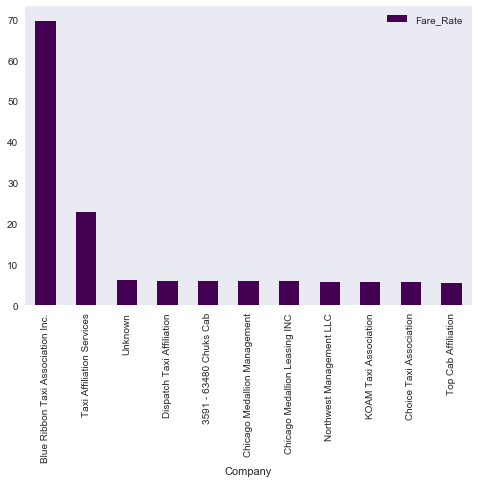

In [25]:
frComp.plot(x= "Company",y = "Fare_Rate",secondary_y= "Avg_Trip_Miles",kind='Bar',colormap='viridis')
plt.show()

In [47]:
#Average Fare_Rate by community Area
commRate = getRes("select * from (select Pickup_Community_Area,avg(fare/trip_miles) as Fare_Rate, avg((fare/Trip_Seconds)*60) as Fare_Minute,count(1) as No_Of_Trips from taxi_mini group by Pickup_Community_Area) cr where No_Of_Trips >100 order by Fare_Rate desc;")
commRate

,Pickup_Community_Area,Fare_Rate,Fare_Minute,No_Of_Trips
0,39,25.520069,1.464024,134
1,21,19.245776,1.265787,186
2,35,19.070018,1.099518,114
3,2,16.609883,1.524504,410
4,41,15.774612,2.301860,432
5,34,14.320329,1.152503,176
6,24,14.049551,1.164867,2955
7,1,13.962807,1.200771,460
8,77,13.060675,1.308930,1182
9,0,12.833106,1.182955,600


In [10]:
#Average tips
getRes("select avg(tips) from taxi_mini where tips < (2*fare);")

,avg(tips)
0,1.838265


In [48]:
#Company Market share by revenue
compRev = getRes("select Company,sum(Trip_Total) Revenue, count(1) as Number_Of_Trips from taxi_mini group by Company order by Revenue desc;")
trimCompRev = compRev.iloc[:10,:]
print(trimCompRev)
trimCompRev.loc[len(trimCompRev),:] = ["Others",compRev.iloc[10:,1].sum(),compRev.iloc[10:,2].sum()]
trimCompRev

                             Company     Revenue  Number_Of_Trips
0                            Unknown  1450732.23            83082
1          Taxi Affiliation Services   440015.54            24519
2            Choice Taxi Association   227423.81            12324
3           Northwest Management LLC   220389.61            13308
4          Dispatch Taxi Affiliation   196302.96            12251
5  Blue Ribbon Taxi Association Inc.    91520.05             3819
6       Chicago Medallion Management    63391.96             3796
7                Top Cab Affiliation    61772.48             3253
8              KOAM Taxi Association    54641.47             3230
9      Chicago Medallion Leasing INC    54366.69             3402


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Company,Revenue,Number_Of_Trips
0,Unknown,1450732.23,83082.0
1,Taxi Affiliation Services,440015.54,24519.0
2,Choice Taxi Association,227423.81,12324.0
3,Northwest Management LLC,220389.61,13308.0
4,Dispatch Taxi Affiliation,196302.96,12251.0
5,Blue Ribbon Taxi Association Inc.,91520.05,3819.0
6,Chicago Medallion Management,63391.96,3796.0
7,Top Cab Affiliation,61772.48,3253.0
8,KOAM Taxi Association,54641.47,3230.0
9,Chicago Medallion Leasing INC,54366.69,3402.0


                             Company     Revenue  Number_Of_Trips
0                            Unknown  1450732.23            83082
1          Taxi Affiliation Services   440015.54            24519
2            Choice Taxi Association   227423.81            12324
3           Northwest Management LLC   220389.61            13308
4          Dispatch Taxi Affiliation   196302.96            12251
5  Blue Ribbon Taxi Association Inc.    91520.05             3819
6       Chicago Medallion Management    63391.96             3796
7                Top Cab Affiliation    61772.48             3253
8              KOAM Taxi Association    54641.47             3230
9      Chicago Medallion Leasing INC    54366.69             3402


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Company,Revenue,Number_Of_Trips
0,Unknown,1450732.23,83082.0
1,Taxi Affiliation Services,440015.54,24519.0
2,Choice Taxi Association,227423.81,12324.0
3,Northwest Management LLC,220389.61,13308.0
4,Dispatch Taxi Affiliation,196302.96,12251.0
5,Blue Ribbon Taxi Association Inc.,91520.05,3819.0
6,Chicago Medallion Management,63391.96,3796.0
7,Top Cab Affiliation,61772.48,3253.0
8,KOAM Taxi Association,54641.47,3230.0
9,Chicago Medallion Leasing INC,54366.69,3402.0


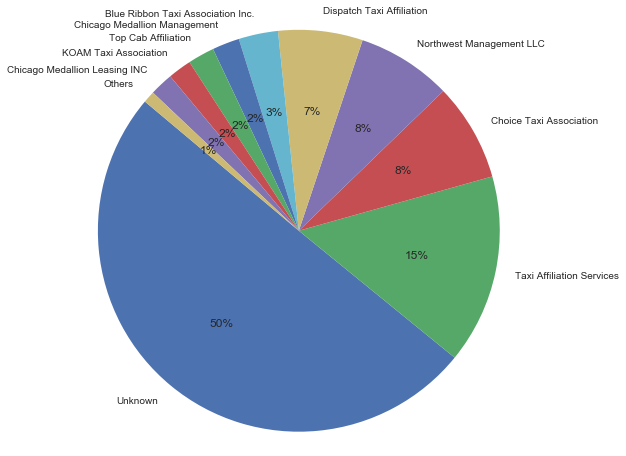

In [44]:
fig = plt.figure(figsize=(8,8))
plt.pie(trimCompRev["Revenue"], labels=trimCompRev["Company"],
        autopct='%1.0f%%', shadow=False, startangle=140 )
#plt.legend(trimTaxiComp["No_Of_Taxis"], trimTaxiComp["Company"], loc="best")
#autopct='%1.1f%%'
plt.axis('equal')
plt.show()

In [78]:
#Max tipped company
tipsgetRes("select * from (select Company,avg(Tips) Tips_Made, count(1) as Trips from taxi_mini group by Company) tip where Trips >100 order by Tips_Made desc;")

,Company,Tips_Made,Trips
0,Blue Ribbon Taxi Association Inc.,2.578735,3819
1,Choice Taxi Association,2.183520,12324
2,Top Cab Affiliation,1.947765,3253
3,Northwest Management LLC,1.851098,13308
4,Taxi Affiliation Services,1.825590,24519
5,KOAM Taxi Association,1.804867,3230
6,Chicago Medallion Management,1.794647,3796
7,Unknown,1.779015,83082
8,Dispatch Taxi Affiliation,1.739501,12251
9,Chicago Medallion Leasing INC,1.706875,3402


In [15]:
#Number of taxis owned by each company
taxiComp = getRes("select Company,count(distinct Taxi_ID) as No_Of_Taxis from taxi_mini group by Company order by No_Of_Taxis Desc;")

In [29]:
taxiComp.iloc[10:,:].sum().iloc[1]

37

In [72]:
trimTaxiComp = taxiComp.iloc[:9,:]

In [73]:
trimTaxiComp.loc[len(trimTaxiComp),:] = ["Others",37]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


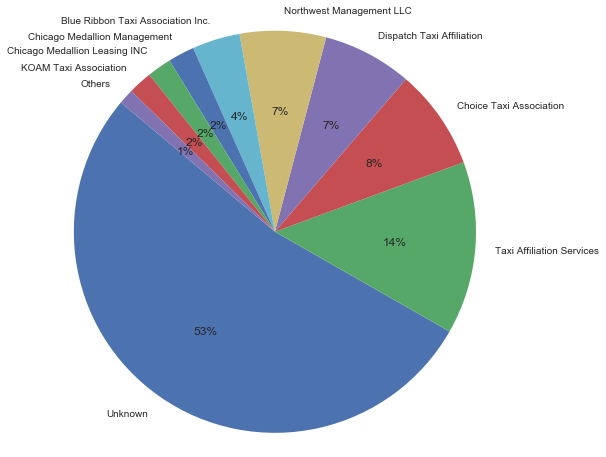

In [74]:
fig = plt.figure(figsize=(8,8))
plt.pie(trimTaxiComp["No_Of_Taxis"], labels=trimTaxiComp["Company"],
        autopct='%1.0f%%', shadow=False, startangle=140 )
#plt.legend(trimTaxiComp["No_Of_Taxis"], trimTaxiComp["Company"], loc="best")
#autopct='%1.1f%%'
plt.axis('equal')
plt.show()

In [45]:
#Dominance by Company per community area
dom = getRes("select m.Pickup_Community_Area,n.Company,m.Max_Trips from (   (select Pickup_Community_Area,max(No_Of_Trips) as Max_Trips from (select Pickup_Community_Area,Company,count(1) as No_Of_Trips from taxi_mini where Company != 'Unknown' group by Pickup_Community_Area,Company order by Pickup_Community_Area,No_Of_Trips desc  ) a group by Pickup_Community_Area) m join (select Pickup_Community_Area,Company,count(1) as No_Of_Trips from taxi_mini where Company != 'Unknown' group by Pickup_Community_Area,Company) n on (m.Pickup_Community_Area = n.Pickup_Community_Area and m.Max_Trips = n.No_Of_Trips))")
dom

,Pickup_Community_Area,Company,Max_Trips
0,0,Taxi Affiliation Services,128
1,1,Taxi Affiliation Services,100
2,2,Taxi Affiliation Services,101
3,3,Taxi Affiliation Services,276
4,4,Taxi Affiliation Services,67
5,5,Taxi Affiliation Services,99
6,6,Taxi Affiliation Services,1429
7,7,Taxi Affiliation Services,909
8,8,Taxi Affiliation Services,7830
9,9,Taxi Affiliation Services,3
